# MDL DB read

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import os

import data
from mdldb.mdl_db import MDLDataBase
from mdldb.tables import Base, Model, LoadingCondition, Run, Min, Mean, Max, Std
from mdldb import mdl_to_evaluation
from evaluation.run_dynamic import RunDynamic
from evaluation.run_manoeuvring import RunZigZag
import xarray as xr

c:\dev\rolldecay\venv\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///' + data.mdl_db_path)
db = MDLDataBase(engine=engine)

In [4]:
db.session.query(Run.test_type).distinct().all()

[('smeg'),
 ('seakeeping'),
 ('teckenkoll'),
 ('prepare'),
 ('GM'),
 ('reference speed'),
 ('roll decay'),
 ('rodergrundvinkel'),
 ('zigzag'),
 ('turning circle'),
 ('rerun'),
 ('u turn'),
 ('spiral'),
 ('unknown'),
 ('bollard pull'),
 ('captive'),
 ('none standard'),
 ('crash stop'),
 ('wave calibration'),
 ('pitch decay'),
 ('surge decay'),
 ('sway decay'),
 ('softmooring'),
 ('williamson turn'),
 ('heave decay'),
 ('yaw decay')]

In [5]:
len(db.session.query(Run).filter(Run.test_type=='roll decay').all())

407

In [6]:
roll_decay_tests = db.session.query(Run).filter(Run.test_type=='roll decay')

In [7]:
db_run = roll_decay_tests[0]

In [8]:
db_run.ship_speed

1.0

In [9]:
db_run.loading_condition.name

'8.57'

In [10]:
sql = """
SELECT * 
FROM run
WHERE test_type='roll decay';
"""
df = pd.read_sql(sql,
                           con=db.engine)

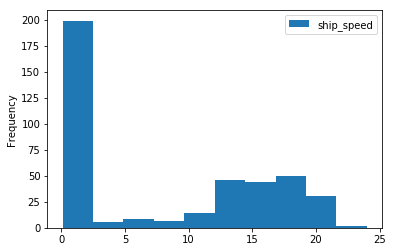

In [11]:
df.plot(y='ship_speed', kind='hist', bins=10)

In [12]:
ascii_file = db_run.load()

In [13]:
df = ascii_file.channels
df.head()

,Prop.tr SB,Prop.tr BB,Mom SB,Mom BB,Hj. Mom,Acc X,Acc Y1 F,Acc Y2 A,Acc Z1 BB F,Acc Z2 A,Acc Z3 SB F,Rodervinkel,Varv SB,Varv BB,X väster,X öster,Y,Delta-X,Psi,MA_Alfa,MA_Beta,MA_Gamma,MA_Delta,MA_Korr,MA_Fi,MA_Theta,Våghöjd pg
0.00,-0.086573,0.235301,-0.035933,0.032627,-0.025887,0.016320,-0.001197,-0.028365,0.013399,0.001988,-0.001849,0.000866,-0.306796,-0.306796,-94645.0,-94641.0,469.0,-225.0,615.0,13.0,-238.0,-53.0,-113.0,-1.0,0.0,2.0,-0.000284
0.02,-0.024546,0.177163,-0.035933,0.032627,-0.037366,-0.017191,-0.001197,0.008465,-0.008157,0.001988,-0.001849,-0.000167,0.000000,0.306796,-94645.0,-94641.0,469.0,-225.0,615.0,13.0,-237.0,-53.0,-113.0,-1.0,0.0,2.0,-0.000284
0.04,-0.024546,0.177163,-0.035933,0.032627,-0.037366,-0.017191,-0.036417,0.008465,-0.008157,-0.014231,-0.001849,-0.000511,0.000000,0.306796,-94645.0,-94641.0,469.0,-225.0,615.0,13.0,-237.0,-53.0,-113.0,-1.0,0.0,2.0,-0.000284
0.06,-0.024546,0.177163,-0.035933,0.032627,-0.025887,-0.017191,-0.001197,-0.009950,0.013399,0.018208,0.018406,-0.000167,0.000000,-0.613592,-94645.0,-94641.0,469.0,-225.0,615.0,13.0,-237.0,-53.0,-113.0,-1.0,0.0,2.0,-0.000284
0.08,-0.024546,0.177163,-0.035933,0.032627,-0.010582,0.016320,-0.018807,-0.009950,-0.008157,0.001988,-0.022103,-0.000855,-0.306796,0.306796,-94645.0,-94641.0,469.0,-225.0,615.0,13.0,-237.0,-53.0,-113.0,-1.0,0.0,2.0,-0.000284


In [14]:
run = mdl_to_evaluation.db_run_to_evaluation_run(run=db_run)

c:\dev\evaluation\signal_lab\cut_file.py:271: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.units = units_
c:\dev\evaluation\signal_lab\mdl_to_evaluation.py:103: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_.units = units
c:\dev\evaluation\signal_lab\cut_file.py:496: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.units = units


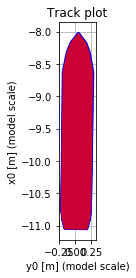

In [15]:
run.track_plot()

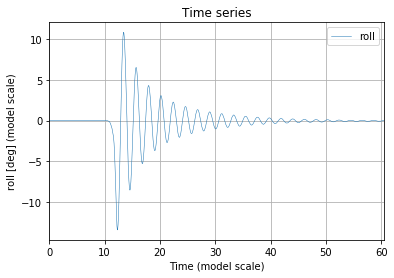

In [16]:
run.plot('roll')

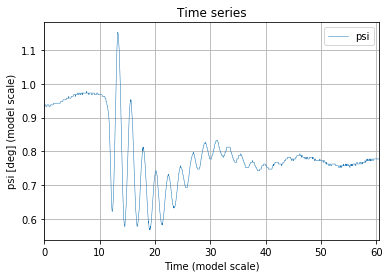

In [17]:
run.plot('psi')

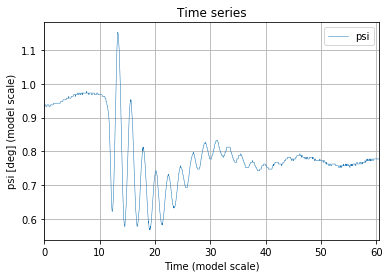

In [18]:
run.plot('psi')

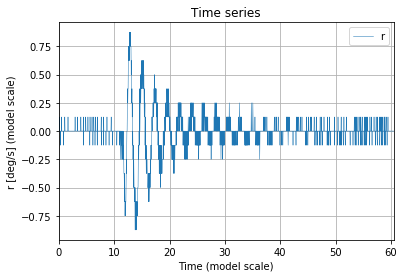

In [19]:
run.plot('r')

In [20]:
run.evaluate()

c:\dev\evaluation\evaluation\evaluation_helpers.py:284: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  statistics.units = statistical_units


,Carriage/Psip,Carriage/Xp_east,Carriage/Xp_west,Carriage/Yp,Carriage/dXp,MA/Alfa,MA/Beta,MA/Delta,MA/Gamma,MA/Pitch,MA/Roll,MA/Torkorr,V,beta,distance,dpsi,heave,p,pitch,psi,q,r,roll,surge,sway,time,u,v,x0,x0dot,x_origo,y0,y0dot,y_origo,yaw,z0,z_origo
min,0.632572,-9.4641,-9.464500e+00,0.0469,-2.250000e-02,-0.065000,-1.405000,-0.635000,-0.520000,-0.085000,-13.470000,-1.000000,0.000000,-179.515000,0.000000,-0.065000,-0.000178,-0.469057,-0.085000,0.567572,-8.726646e-03,-0.015272,-13.470000,-0.004966,-0.051259,0.000000,-8.481759e-03,-0.234529,-9.541508,-0.009486,-9.511800,-0.006965,-0.234515,0.031960,-0.230620,-0.000178,-0.001408
mean,0.632572,-9.4641,-9.464500e+00,0.0469,-2.250000e-02,0.068653,-1.184451,-0.500274,-0.334655,0.007968,-0.137863,-0.465961,0.012597,1.131060,0.501840,0.165620,0.001103,0.000001,0.007968,0.798191,1.719818e-21,-0.000045,-0.137863,-0.001731,-0.019600,30.250000,-9.435208e-08,-0.000025,-9.538252,-0.000003,-9.508592,0.037276,-0.000025,0.038149,0.000000,0.001103,0.000958
max,0.632572,-9.4641,-9.464500e+00,0.0469,-2.250000e-02,0.335000,-0.985000,-0.100000,0.180000,0.030000,10.890000,1.000000,0.245806,180.000000,0.804859,0.520000,0.009535,0.599957,0.030000,1.152572,1.090831e-02,0.015272,10.890000,0.002346,0.033098,60.500000,9.348998e-03,0.245789,-9.534597,0.010381,-9.505001,0.078077,0.245798,0.049711,0.354380,0.009535,0.005577
std,-0.000000,0.0000,1.776357e-15,0.0000,6.938894e-18,0.022916,0.095085,0.063084,0.090770,0.013169,2.196856,0.502145,0.027882,110.047568,0.287729,0.102284,0.000794,0.102249,0.013169,0.102284,9.534915e-04,0.002841,2.196856,0.001878,0.014872,17.470618,1.252991e-03,0.030570,0.001675,0.001298,0.001678,0.007863,0.030568,0.003500,0.102284,0.000794,0.000397
sig,-0.000000,0.0000,3.552714e-15,0.0000,1.387779e-17,0.045831,0.190170,0.126167,0.181540,0.026337,4.393711,1.004289,0.055763,220.095136,0.575457,0.204568,0.001589,0.204498,0.026337,0.204568,1.906983e-03,0.005682,4.393711,0.003755,0.029744,34.941236,2.505982e-03,0.061139,0.003349,0.002597,0.003357,0.015725,0.061136,0.007000,0.204568,0.001589,0.000794
per,inf,inf,inf,inf,inf,19.902762,23.187626,21.045880,21.338088,40.910716,2.205885,16.765216,51.756565,2.163985,76.239575,25.320409,49.935157,2.202342,40.910716,25.320409,1.136402e+00,2.211727,2.205885,22.853544,69.735975,68.542104,2.140201e+01,2.227850,22.920376,21.328564,22.859181,2.233611,2.227843,17.014994,25.320409,49.935157,1.197093
tz,NaN,NaN,NaN,NaN,NaN,1.815385,12.105000,3.943333,5.530000,1.682222,2.243333,3.041250,2.209600,NaN,NaN,3.643333,4.448889,2.359091,1.682222,3.643333,2.333000e+00,1.017931,2.243333,19.680000,2.466667,NaN,1.041071e+00,1.421714,23.750000,1.015517,23.770000,3.056250,1.666111,3.240000,3.643333,4.448889,1.627586


In [21]:
interesting_columns = ['x0','y0','z0','u','v','roll','pitch','psi','p','q','r']
statistics = run.results['statistics'][interesting_columns]

In [22]:
min = statistics.loc['min']
mean = statistics.loc['mean']
max = statistics.loc['max']
std = statistics.loc['std']


In [23]:
min_db = Min(run_id=db_run.id,**min)
db.session.merge(min_db)
db.session.commit()

mean_db = Mean(run_id=db_run.id,**mean)
db.session.merge(mean_db)
db.session.commit()

max_db = Max(run_id=db_run.id,**max)
db.session.merge(max_db)
db.session.commit()

std_db = Std(run_id=db_run.id,**std)
db.session.merge(std_db)
db.session.commit()



## Add statistics from runs

In [24]:
roll_decay_tests = db.session.query(Run).filter(Run.test_type=='roll decay')
failed_runs = []
interesting_columns = ['x0','y0','z0','u','v','roll','pitch','psi','p','q','r','delta']

for db_run in roll_decay_tests:
    
    if db.session.query(Min).get(db_run.id):
        continue  # This has already been handled
    
    if db_run.ship_speed is None:
        db_run.ship_speed=0
    
    if db_run.ship.lpp is None:
        db_run.ship.lpp = 0
    
    if db_run.ship.beam is None:
        db_run.ship.beam = 0
            
    try:
        run = mdl_to_evaluation.db_run_to_evaluation_run(run=db_run)
    except FileNotFoundError():
        failed_runs.append(db_run.id)
        continue
    
    run.evaluate()    
    
    _interesting_columns = ['x0','y0','z0','u','v','roll','pitch','psi','p','q','r','delta']
    if not 'delta' in run.results['statistics'].columns:
        _interesting_columns.remove('delta')
    
    missing= set(_interesting_columns)-set(run.results['statistics'].columns)
    
    if len(missing) >0:
        failed_runs.append(db_run.id)
        continue
        
    statistics = run.results['statistics'][_interesting_columns]
    
    min = statistics.loc['min']
    mean = statistics.loc['mean']
    max = statistics.loc['max']
    std = statistics.loc['std']
    
    min_db = Min(run_id=db_run.id,**min)
    db.session.merge(min_db)
    #db.session.commit()
    
    mean_db = Mean(run_id=db_run.id,**mean)
    db.session.merge(mean_db)
    #db.session.commit()
    
    max_db = Max(run_id=db_run.id,**max)
    db.session.merge(max_db)
    #db.session.commit()
    
    std_db = Std(run_id=db_run.id,**std)
    db.session.merge(std_db)
    db.session.commit()

In [25]:
len(db.session.query(Min).filter(Run.test_type=='roll decay').all())

407

In [26]:
len(db.session.query(Run).filter(Run.test_type=='roll decay').all())

407

In [27]:
run.df.head()

,Carriage/Psip,Carriage/Xp_east,Carriage/Xp_west,Carriage/Yp,Carriage/dXp,MA/Alfa,MA/Beta,MA/Delta,MA/Gamma,MA/Pitch,MA/Roll,MA/Torkorr,dpsi,psi,x_origo,y_origo,z_origo,roll,pitch,x0,y0,z0,time,distance,x0dot,y0dot,p,q,r,u,v,V,beta,surge,sway,yaw,heave
00:00:00,0.01104,-9.4641,-9.4645,0.0469,-0.0225,0.001134,-0.020769,-0.009861,-0.004625,0.000175,0.0,-0.017453,0.005236,0.016276,-9.508596,0.036135,0.000895,0.0,0.000175,-9.538262,0.035652,0.000900,0.00,0.000000,0.004362,0.000028,0.0,0.0,0.000000,4.362069e-03,-0.000043,0.004362,0.009861,0.000000,0.000000,0.002345,0.000900
00:00:00.020000,0.01104,-9.4641,-9.4645,0.0469,-0.0225,0.001134,-0.020682,-0.009861,-0.004625,0.000175,0.0,-0.017453,0.005236,0.016276,-9.508508,0.036136,0.000896,0.0,0.000175,-9.538174,0.035653,0.000902,0.02,0.000087,0.002181,0.000014,0.0,0.0,0.000000,2.181034e-03,-0.000022,0.002181,0.009861,0.000086,-0.000015,0.002345,0.000902
00:00:00.040000,0.01104,-9.4641,-9.4645,0.0469,-0.0225,0.001134,-0.020682,-0.009861,-0.004625,0.000175,0.0,-0.017453,0.005236,0.016276,-9.508508,0.036136,0.000896,0.0,0.000175,-9.538174,0.035653,0.000902,0.04,0.000087,0.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,-0.000000,0.000085,-0.000029,0.002345,0.000902
00:00:00.060000,0.01104,-9.4641,-9.4645,0.0469,-0.0225,0.001134,-0.020682,-0.009861,-0.004625,0.000175,0.0,-0.017453,0.005236,0.016276,-9.508508,0.036136,0.000896,0.0,0.000175,-9.538174,0.035653,0.000902,0.06,0.000087,0.000000,0.000000,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,-0.000000,0.000084,-0.000043,0.002345,0.000902
00:00:00.080000,0.01104,-9.4641,-9.4645,0.0469,-0.0225,0.001134,-0.020682,-0.009861,-0.004625,0.000175,0.0,-0.017453,0.005236,0.016276,-9.508508,0.036136,0.000896,0.0,0.000175,-9.538174,0.035653,0.000902,0.08,0.000087,0.000001,-0.000065,0.0,0.0,0.002182,2.824324e-09,-0.000065,0.000065,1.570753,0.000083,-0.000057,0.002345,0.000902


In [28]:
db_run.ship.lpp

110.0

In [29]:
db_run.loading_condition

In [30]:
run = mdl_to_evaluation.db_run_to_evaluation_run(run=db_run)

In [31]:
run.df.head()

,Carriage/Psip,Carriage/Xp_east,Carriage/Xp_west,Carriage/Yp,Carriage/dXp,MA/Alfa,MA/Beta,MA/Delta,MA/Gamma,MA/Pitch,MA/Roll,MA/Torkorr,dpsi,psi,x_origo,y_origo,z_origo,roll,pitch,x0,y0,z0,time,distance,x0dot,y0dot,p,q,r,u,v,V,beta,surge,sway,yaw,heave
00:00:00,0.000054,21.3997,21.3993,-0.0011,-1.3997,0.000436,0.001309,0.004974,0.005323,0.0,-0.000349,-0.017453,0.000349,0.000403,20.000658,-0.001772,0.000436,-0.000349,0.0,19.933306,-0.001876,0.000436,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000000,0.000000,0.000327,0.000436
00:00:00.020000,0.000054,21.3997,21.3993,-0.0011,-1.3997,0.000436,0.001309,0.004974,0.005323,0.0,-0.000349,-0.017453,0.000349,0.000403,20.000658,-0.001772,0.000436,-0.000349,0.0,19.933306,-0.001876,0.000436,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000008,-0.000033,0.000327,0.000436
00:00:00.040000,0.000054,21.3997,21.3993,-0.0011,-1.3997,0.000436,0.001309,0.004974,0.005323,0.0,-0.000349,-0.017453,0.000349,0.000403,20.000658,-0.001772,0.000436,-0.000349,0.0,19.933306,-0.001876,0.000436,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000016,-0.000066,0.000327,0.000436
00:00:00.060000,0.000054,21.3997,21.3993,-0.0011,-1.3997,0.000436,0.001309,0.004974,0.005323,0.0,-0.000349,-0.017453,0.000349,0.000403,20.000658,-0.001772,0.000436,-0.000349,0.0,19.933306,-0.001876,0.000436,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000024,-0.000100,0.000327,0.000436
00:00:00.080000,0.000054,21.3997,21.3993,-0.0011,-1.3997,0.000436,0.001309,0.004974,0.005323,0.0,-0.000349,-0.017453,0.000349,0.000403,20.000658,-0.001772,0.000436,-0.000349,0.0,19.933306,-0.001876,0.000436,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000032,-0.000133,0.000327,0.000436
